### Package Importing

In [55]:
# Importing all the required packages for this task

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
# from sklearn import metrics


In [56]:
# # import nltk
# # nltk.download('wordnet')
# pip install 

In [57]:
# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging
import string # Inbuilt string library
from emot.emo_unicode import UNICODE_EMOJI
# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image # for opening, manipulating, and saving many different image file f
from textblob import TextBlob # TextBlob - Python library for processing textual data
import matplotlib.pyplot as plt
import random 
import pickle
import re




In [58]:
tweets_df = pd.read_csv("clean_processed_tweet_data.csv")

In [59]:
tweets_df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",10year yield telling us theres high risk somet...,0.16,0.540000,en,188,43,davideiacovozzi,18,55,NaN,"gold, silver, crypto",NorthstarCharts,NaN
1,39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",german 10y mortgage rate went 08 250 hear soun...,0.15,0.175000,en,179,32,davideiacovozzi,18,55,NaN,NaN,MichaelAArouet,NaN
2,42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",30year mortgage rate us rises 511 highest leve...,0.00,0.183333,en,620,213,davideiacovozzi,18,55,NaN,NaN,charliebilello,NaN
3,43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",rates rise something breaks anything broken yet,-0.40,0.400000,en,1787,417,davideiacovozzi,18,55,False,NaN,biancoresearch,NaN
4,44,2022-04-19 10:59:33+00:00,"<a href=""http://twitter.com/download/android"" ...",buying opportunities like occur every years bonds,-0.10,0.550000,en,1156,162,davideiacovozzi,18,55,False,bonds,LanceRoberts,NaN


#### Data Understanding Management

In [60]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16386 entries, 0 to 16385
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16386 non-null  int64  
 1   created_at          16386 non-null  object 
 2   source              16386 non-null  object 
 3   original_text       16386 non-null  object 
 4   polarity            16386 non-null  float64
 5   subjectivity        16386 non-null  float64
 6   lang                16386 non-null  object 
 7   favorite_count      16386 non-null  int64  
 8   retweet_count       16386 non-null  int64  
 9   original_author     16386 non-null  object 
 10  followers_count     16386 non-null  int64  
 11  friends_count       16386 non-null  int64  
 12  possibly_sensitive  6182 non-null   object 
 13  hashtags            5278 non-null   object 
 14  user_mentions       12084 non-null  object 
 15  place               10714 non-null  object 
dtypes: f

In [61]:
tweets_df.shape #Get number of rows and columns

(16386, 16)

In [62]:
# Check the number of missing values

print("The number of missing value(s): {}".format(tweets_df.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets_df.columns[tweets_df.isnull().any()]))

The number of missing value(s): 31286
Columons having columns value:Index(['possibly_sensitive', 'hashtags', 'user_mentions', 'place'], dtype='object')


In [63]:
tweets_df.isna().any() # Check for "NaN" values

Unnamed: 0            False
created_at            False
source                False
original_text         False
polarity              False
subjectivity          False
lang                  False
favorite_count        False
retweet_count         False
original_author       False
followers_count       False
friends_count         False
possibly_sensitive     True
hashtags               True
user_mentions          True
place                  True
dtype: bool

In [64]:
tweets_df['place']=tweets_df['place'].fillna('No place') # Replace "NaN" values with "No Location"
tweets_df['possibly_sensitive']=tweets_df['possibly_sensitive'].fillna('Neutral') # Replace "NaN" values with "possibly_sensitive"
tweets_df['hashtags']=tweets_df['hashtags'].fillna('No hashtags') # Replace "NaN" values with "hashtags"
tweets_df['user_mentions']=tweets_df['user_mentions'].fillna('No user mention') # Replace "NaN" values with "user_mentions"

In [65]:
tweets_df.isna().any() # Check for "NaN" values again

Unnamed: 0            False
created_at            False
source                False
original_text         False
polarity              False
subjectivity          False
lang                  False
favorite_count        False
retweet_count         False
original_author       False
followers_count       False
friends_count         False
possibly_sensitive    False
hashtags              False
user_mentions         False
place                 False
dtype: bool

In [70]:
# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    
    # Remove punctuations
    unpunctuated_words = [char for char in tweet_tokens if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them
    
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [69]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
tweets_df['Tweets_Adjectives'] = tweets_df['original_text'].apply(getAdjectives)

In [71]:
tweets_df.head() # Check dataframe first 5 rows

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,Tweets_Adjectives
0,38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",10year yield telling us theres high risk somet...,0.16,0.540000,en,188,43,davideiacovozzi,18,55,Neutral,"gold, silver, crypto",NorthstarCharts,No place,high
1,39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",german 10y mortgage rate went 08 250 hear soun...,0.15,0.175000,en,179,32,davideiacovozzi,18,55,Neutral,No hashtags,MichaelAArouet,No place,german sound german real bubble
2,42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",30year mortgage rate us rises 511 highest leve...,0.00,0.183333,en,620,213,davideiacovozzi,18,55,Neutral,No hashtags,charliebilello,No place,last low
3,43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",rates rise something breaks anything broken yet,-0.40,0.400000,en,1787,417,davideiacovozzi,18,55,False,No hashtags,biancoresearch,No place,broken
4,44,2022-04-19 10:59:33+00:00,"<a href=""http://twitter.com/download/android"" ...",buying opportunities like occur every years bonds,-0.10,0.550000,en,1156,162,davideiacovozzi,18,55,False,bonds,LanceRoberts,No place,occur


In [72]:
# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [74]:

# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
tweets_df['Tweets_Sentiments'] = tweets_df['original_text'].apply(preprocessTweetsSentiments)

In [77]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
tweets_df['Tweets_Adjectives'] = tweets_df['original_text'].apply(getAdjectives)

In [78]:
tweets_df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,Tweets_Adjectives,Tweets_Sentiments
0,38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",10year yield telling us theres high risk somet...,0.16,0.540000,en,188,43,davideiacovozzi,18,55,Neutral,"gold, silver, crypto",NorthstarCharts,No place,high,10year yield telling u there high risk somethi...
1,39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",german 10y mortgage rate went 08 250 hear soun...,0.15,0.175000,en,179,32,davideiacovozzi,18,55,Neutral,No hashtags,MichaelAArouet,No place,german sound german real bubble,german 10y mortgage rate went 08 250 hear soun...
2,42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",30year mortgage rate us rises 511 highest leve...,0.00,0.183333,en,620,213,davideiacovozzi,18,55,Neutral,No hashtags,charliebilello,No place,last low,30year mortgage rate u rise 511 highest level ...
3,43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",rates rise something breaks anything broken yet,-0.40,0.400000,en,1787,417,davideiacovozzi,18,55,False,No hashtags,biancoresearch,No place,broken,rate rise something break anything broken yet
4,44,2022-04-19 10:59:33+00:00,"<a href=""http://twitter.com/download/android"" ...",buying opportunities like occur every years bonds,-0.10,0.550000,en,1156,162,davideiacovozzi,18,55,False,bonds,LanceRoberts,No place,occur,buying opportunity like occur every year bond


In [79]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [80]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

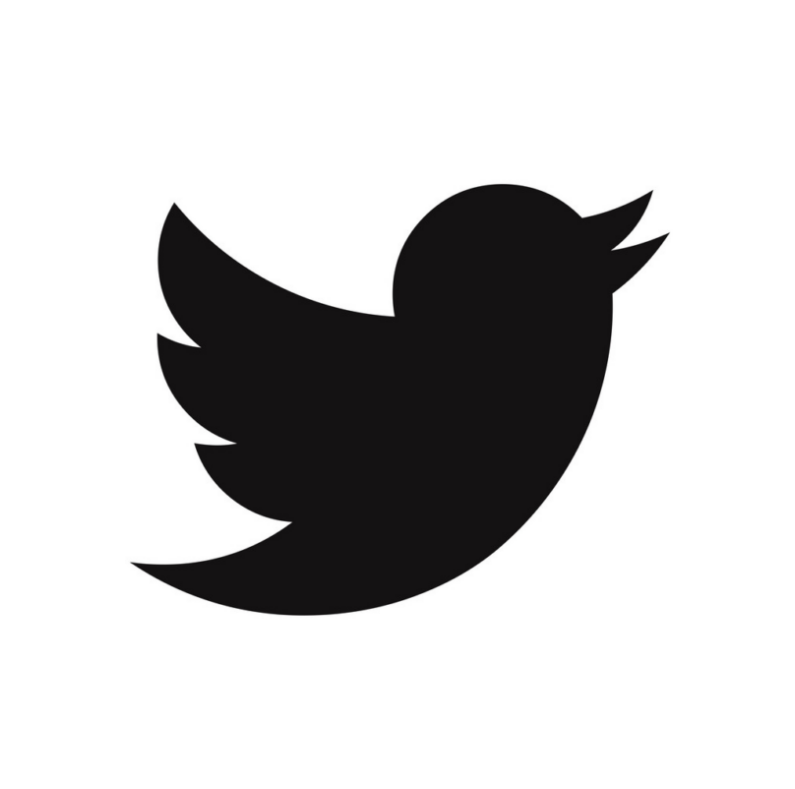

In [82]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

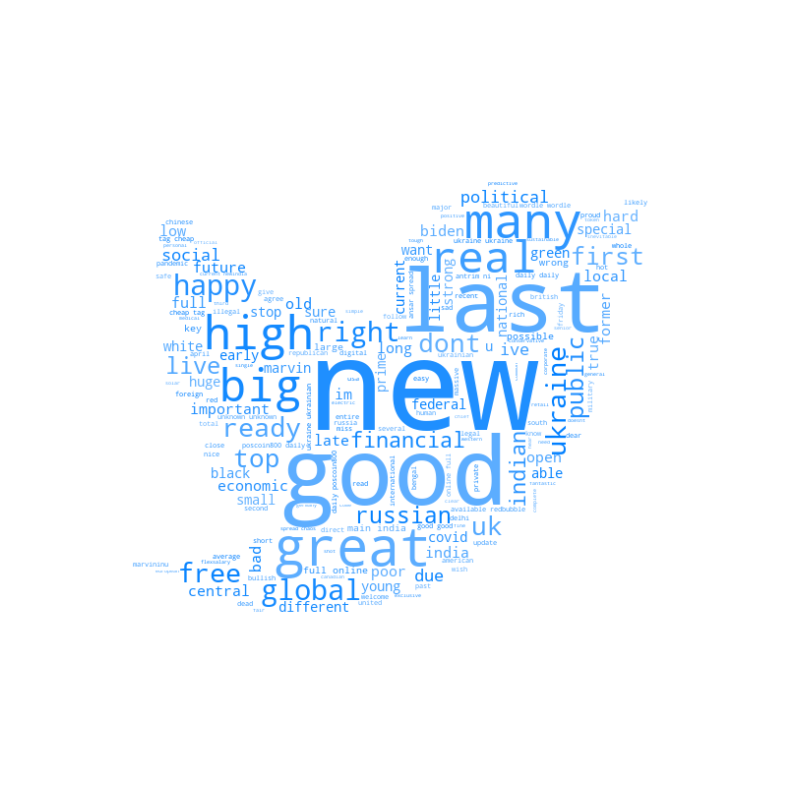

In [83]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

### Sentiment Analysis

In [84]:
# Create function to obtain Subjectivity Score
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [85]:
# Apply all functions above to respective columns
tweets_df['Subjectivity']=tweets_df['Tweets_Sentiments'].apply(getSubjectivity)
tweets_df['Polarity']=tweets_df['Tweets_Sentiments'].apply(getPolarity)
tweets_df['Sentiment']=tweets_df['Polarity'].apply(getSentimentTextBlob)

In [86]:
# See quick results of the Sentiment Analysis
tweets_df['Sentiment'].value_counts()

Neutral     7847
Positive    5975
Negative    2564
Name: Sentiment, dtype: int64

In [87]:
# Create dataframe for Count of Sentiment Categories
bar_chart = tweets_df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [88]:
bar_chart # Display dataframe

,Sentiment,Total Tweets
0,Neutral,7847
1,Positive,5975
2,Negative,2564


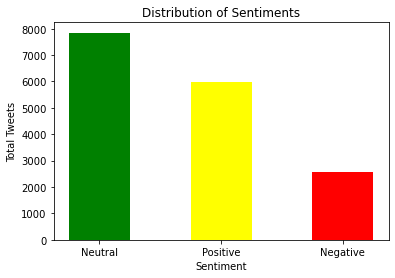

In [89]:
x = bar_chart['Sentiment']
y = bar_chart['Total Tweets']
c = ["green", "yellow", "red"]
plt.bar(x, y, width=0.5, color=c)
plt.xlabel("Sentiment")
plt.ylabel("Total Tweets")
plt.title("Distribution of Sentiments")
plt.show()


#### Score

In [90]:
clean_tweet = tweets_df[['Tweets_Sentiments','polarity']]

In [91]:
clean_tweet.head(5)

,Tweets_Sentiments,polarity
0,10year yield telling u there high risk somethi...,0.16
1,german 10y mortgage rate went 08 250 hear soun...,0.15
2,30year mortgage rate u rise 511 highest level ...,0.00
3,rate rise something break anything broken yet,-0.40
4,buying opportunity like occur every year bond,-0.10


In [92]:
score = pd.Series([getSentimentTextBlob(row_value) for row_value in clean_tweet['polarity']])

In [93]:
clean_tweet = pd.concat([clean_tweet, score.rename("score")], axis=1)

In [94]:
clean_tweet.head(n=10)

,Tweets_Sentiments,polarity,score
0,10year yield telling u there high risk somethi...,0.160000,Positive
1,german 10y mortgage rate went 08 250 hear soun...,0.150000,Positive
2,30year mortgage rate u rise 511 highest level ...,0.000000,Neutral
3,rate rise something break anything broken yet,-0.400000,Negative
4,buying opportunity like occur every year bond,-0.100000,Negative
5,welcome september 2018 bond market testing ris...,0.400000,Positive
6,horse think thing saddle another,0.000000,Neutral
7,global growth optimism time low raise rate 8 9...,0.488281,Positive
8,important chart world demand outlook demand so...,0.450000,Positive
9,annual mortgage payment u 35 higher peak 2006 ...,0.250000,Positive


In [95]:
len(clean_tweet['polarity'])

16386

In [96]:
scoremap = pd.Series([1 if row_value == 'Positive' else 0 for row_value in clean_tweet['score']])

In [97]:
len(scoremap)

16386

In [98]:
clean_tweet['scoremap'] = scoremap
X = clean_tweet['Tweets_Sentiments']
y = clean_tweet['scoremap']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
print(X_train.size,',' , X_test.size)
print(X_test.size, ',',y_test.size)

13108 , 3278
3278 , 3278


In [101]:
# scaling the input
clf = LinearSVC()

In [102]:
unigram_tfidf_vect = TfidfVectorizer(max_features=10000, ngram_range = (1, 1))
bigram_tfidf_vect = TfidfVectorizer(max_features=10000, ngram_range = (2, 2))
hybrid_tfidf_vect = TfidfVectorizer(max_features=10000, ngram_range = (1, 2))

## Unigram TF-IDF

In [103]:
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = unigram_tfidf_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()
clf.fit(X_train_counts, y_train)

LinearSVC()

In [104]:
X_test = X_test.replace(np.nan, '', regex=True)
X_test_counts = unigram_tfidf_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
prediction = clf.predict(X_test_counts)

In [105]:
np.mean(prediction == y_test)

0.8755338621110433

## Bigram TF-IDF

In [106]:
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = bigram_tfidf_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()
clf.fit(X_train_counts, y_train)

LinearSVC()

In [107]:
X_test = X_test.replace(np.nan, '', regex=True)
X_test_counts = bigram_tfidf_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
prediction = clf.predict(X_test_counts)

In [108]:
np.mean(prediction == y_test)

0.7019524100061013

## Hybridgram TF-IDF

In [109]:
# X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = hybrid_tfidf_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()
model = clf.fit(X_train_counts, y_train)

In [110]:
X_test = X_test.replace(np.nan, '', regex=True)
X_test_counts = hybrid_tfidf_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
prediction = clf.predict(X_test_counts)

In [111]:
np.mean(prediction == y_test)

0.8779743746186699

### Save the Model

In [112]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(y_test)